In [1035]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1036]:
train=pd.read_excel('Doctorfee_Final_Train.xlsx')
test=pd.read_excel('Doctorfee_Final_Test.xlsx')

In [1037]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [1038]:
#Combining the train and test data into a single file
train['Set']='train'
test['Set']='test'
data=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,data.shape)

(5961, 8) (1987, 7) (7948, 8)


In [1039]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Set
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [1040]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
Set                      0
dtype: int64

In [1041]:
def experienceint(x):
    exp=x.split(' ')
    return exp[0]

In [1042]:
data['Experience']=data['Experience'].apply(experienceint)
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Set
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [1043]:
data.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [1044]:
data

,Qualification,Experience,Rating,Place,Profile,Fees,Set
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250.0,train
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,test
7946,BDS,12,98%,"Arekere, Bangalore",Dentist,NaN,test


In [1045]:
data['Rating']=data['Rating'].str.rstrip('%').astype(float)/100

In [1046]:
data

,Qualification,Experience,Rating,Place,Profile,Fees,Set
0,"BHMS, MD - Homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,0.98,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,1.00,"Keelkattalai, Chennai",Ayurveda,250.0,train
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,test
7946,BDS,12,0.98,"Arekere, Bangalore",Dentist,NaN,test


In [1047]:
data[data['Profile']=='Homeopath']

,Qualification,Experience,Rating,Place,Profile,Fees,Set
0,"BHMS, MD - Homeopathy",24,1.0,"Kakkanad, Ernakulam",Homeopath,100.0,train
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,200.0,train
17,"MBBS, MF- Homeopathy",5,NaN,"Purasawakkam, Chennai",Homeopath,300.0,train
37,"BHMS, Diploma in Cosmetology",12,0.9,"Borivali West, Mumbai",Homeopath,300.0,train
41,"BHMS, M. D. Hom. (Practice of Medicine)",12,1.0,"Dahisar West, Mumbai",Homeopath,500.0,train
...,...,...,...,...,...,...,...
7900,BHMS,14,NaN,"Boduppal, Hyderabad",Homeopath,NaN,test
7904,BHMS,16,NaN,"Abbigere, Bangalore",Homeopath,NaN,test
7913,BHMS,5,NaN,"Colaba, Mumbai",Homeopath,NaN,test
7922,BHMS,2,NaN,"Malleswaram, Bangalore",Homeopath,NaN,test


In [1048]:
ratings=data[data['Rating'].notnull()]

In [1049]:
ratings.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            0.962771
Dentist             0.976985
Dermatologists      0.934463
ENT Specialist      0.889732
General Medicine    0.919442
Homeopath           0.965245
Name: Rating, dtype: float64

In [1050]:
def testfillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '.96'

        elif Profile == 'Dentist':
            return '.98'
        elif Profile=='Dermatologists':
            return '.93'
        elif Profile=='ENT Specialist':
            return '.88'
        elif Profile=='General Medicine':
            return '.93'
        elif Profile=='Homeopath':
            return '.96'
    else:
        return Rating

In [1051]:
data['Rating']=data[['Rating','Profile']].apply(testfillratings,axis=1)

In [1052]:
data.isnull().sum()

Qualification       0
Experience          0
Rating              0
Place              31
Profile             0
Fees             1987
Set                 0
dtype: int64

In [1053]:
data=data[data['Place'].notna()]

In [1054]:
data.isnull().sum()

Qualification       0
Experience          0
Rating              0
Place               0
Profile             0
Fees             1981
Set                 0
dtype: int64

In [1055]:
data2 = data.Place.str.split(",",expand=True) 

In [1056]:
data2

,0,1,2
0,Kakkanad,Ernakulam,None
1,Whitefield,Bangalore,None
2,Mathikere - BEL,Bangalore,None
3,Bannerghatta Road,Bangalore,None
4,Keelkattalai,Chennai,None
...,...,...,...
7943,Basavanagudi,Bangalore,None
7944,Choolai,Chennai,None
7945,Porur,Chennai,None
7946,Arekere,Bangalore,None


In [1057]:
data2.columns=('Place','State','Del')

In [1058]:
data2

,Place,State,Del
0,Kakkanad,Ernakulam,None
1,Whitefield,Bangalore,None
2,Mathikere - BEL,Bangalore,None
3,Bannerghatta Road,Bangalore,None
4,Keelkattalai,Chennai,None
...,...,...,...
7943,Basavanagudi,Bangalore,None
7944,Choolai,Chennai,None
7945,Porur,Chennai,None
7946,Arekere,Bangalore,None


In [1059]:
data

,Qualification,Experience,Rating,Place,Profile,Fees,Set
0,"BHMS, MD - Homeopathy",24,1,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,0.98,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,.88,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12,.96,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,1,"Keelkattalai, Chennai",Ayurveda,250.0,train
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,.96,"Basavanagudi, Bangalore",Ayurveda,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,.93,"Choolai, Chennai",Dermatologists,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,.93,"Porur, Chennai",General Medicine,NaN,test
7946,BDS,12,0.98,"Arekere, Bangalore",Dentist,NaN,test


In [1060]:
data2.drop(['Del'],axis=1,inplace=True)
data2.drop(['Place'],axis=1,inplace=True)

In [1061]:
data2.dtypes

State    object
dtype: object

In [1062]:
data2.values.reshape(-1,1)

array([[' Ernakulam'],
       [' Bangalore'],
       [' Bangalore'],
       ...,
       [' Chennai'],
       [' Bangalore'],
       [' Chennai']], dtype=object)

In [1063]:
data2.shape

(7917, 1)

In [1064]:
#data['Place']=data2['State']

In [1065]:
data

,Qualification,Experience,Rating,Place,Profile,Fees,Set
0,"BHMS, MD - Homeopathy",24,1,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,0.98,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,.88,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12,.96,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,1,"Keelkattalai, Chennai",Ayurveda,250.0,train
...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,.96,"Basavanagudi, Bangalore",Ayurveda,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,.93,"Choolai, Chennai",Dermatologists,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,.93,"Porur, Chennai",General Medicine,NaN,test
7946,BDS,12,0.98,"Arekere, Bangalore",Dentist,NaN,test


In [1066]:
data['Place'].value_counts()

Andheri West, Mumbai                  97
HSR Layout, Bangalore                 97
Dwarka, Delhi                         93
Banjara Hills, Hyderabad              85
Mulund West, Mumbai                   81
                                      ..
J.C Nagar, Bangalore                   1
Sangam Vihar, Delhi                    1
Dickenson Road, Bangalore              1
Poojapura, Thiruvananthapuram          1
Vadasserikonam, Thiruvananthapuram     1
Name: Place, Length: 948, dtype: int64

In [1067]:
data3 = data.Qualification.str.split(",",expand=True) 

In [1068]:
data3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,BHMS,MD - Homeopathy,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,BSc - Zoology,BAMS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,BAMS,Doctor of Medicine,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7944,MD - Dermatology,Venereology & Leprosy,MBBS,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7945,MBBS,MD / MS - Obstetrics & Gynaecology,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7946,BDS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [1069]:
data3[0].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSc - Zoology', 'BDS', 'BSc', 'MDS',
       'Diploma in Dermatology', 'DM - Neurology', 'MD - Homeopathy',
       'MDS - Prosthodontist And Crown Bridge',
       'MDS - Oral & Maxillofacial Surgery',
       'MDS - Periodontology and Oral Implantology', 'MD - Dermatology',
       'MDS-Oral Pathology and Oral Microbiology', 'MD - Dermatology ',
       'PhD - Orthodontics & Dentofacial Orthopaedics', 'MRCPS',
       'MDS - Conservative Dentistry & Endodontics',
       'MD - Ayurveda Medicine', 'MS - General Surgery', 'DDVL',
       'MD - General Medicine',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'MS - ENT',
       'MD - Internal Medicine', 'GCEH', 'MS - Otorhinolaryngology',
       'Post Graduate Diploma in Healthcare Management(PGDHM)',
       'DNB - Paediatrics', 'Certification in Aesthetic Dentistry',
       'Fellowship In Laryngology Bronchoesophagology', 'FAGE',
       'Fellowship in Aesthetic Medicine',
       'MS - Ayurvedic Gyne

In [1070]:

def quali(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [1071]:
data3[0]=data3[0].apply(quali)

In [1072]:
data3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,BHMS,MD - Homeopathy,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,BSC,BAMS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,BAMS,Doctor of Medicine,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7944,MD - Dermatology,Venereology & Leprosy,MBBS,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7945,MBBS,MD / MS - Obstetrics & Gynaecology,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7946,BDS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [1073]:
data3.drop([1,2,3,4,5,6,7,8,9,10,11,12,12,13,14,15,16],axis=1,inplace=True)

In [1074]:
data3

,0
0,BHMS
1,BAMS
2,MBBS
3,BSC
4,BAMS
...,...
7943,BAMS
7944,MD - Dermatology
7945,MBBS
7946,BDS


In [1075]:
data['Qualification']=data3

In [1076]:
data

,Qualification,Experience,Rating,Place,Profile,Fees,Set
0,BHMS,24,1,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,BAMS,12,0.98,"Whitefield, Bangalore",Ayurveda,350.0,train
2,MBBS,9,.88,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,BSC,12,.96,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,1,"Keelkattalai, Chennai",Ayurveda,250.0,train
...,...,...,...,...,...,...,...
7943,BAMS,10,.96,"Basavanagudi, Bangalore",Ayurveda,NaN,test
7944,MD - Dermatology,4,.93,"Choolai, Chennai",Dermatologists,NaN,test
7945,MBBS,9,.93,"Porur, Chennai",General Medicine,NaN,test
7946,BDS,12,0.98,"Arekere, Bangalore",Dentist,NaN,test


In [1077]:
train2=data.loc[data['Set']=='train']
test2=data.loc[data['Set']=='test']

In [1078]:
train2

,Qualification,Experience,Rating,Place,Profile,Fees,Set
0,BHMS,24,1,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,BAMS,12,0.98,"Whitefield, Bangalore",Ayurveda,350.0,train
2,MBBS,9,.88,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,BSC,12,.96,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,1,"Keelkattalai, Chennai",Ayurveda,250.0,train
...,...,...,...,...,...,...,...
5956,MBBS,19,0.98,"Basavanagudi, Bangalore",ENT Specialist,300.0,train
5957,MBBS,33,.93,"Nungambakkam, Chennai",General Medicine,100.0,train
5958,MBBS,41,0.97,"Greater Kailash Part 2, Delhi",General Medicine,600.0,train
5959,MBBS,15,0.9,"Vileparle West, Mumbai",General Medicine,100.0,train


In [1079]:
train2.drop(['Set'],axis=1,inplace=True)
train2.drop(['Place'],axis=1,inplace=True)

In [1080]:
test2.drop(['Set'],axis=1,inplace=True)
test2.drop(['Place'],axis=1,inplace=True)
test2.drop(['Fees'],axis=1,inplace=True)

In [1081]:
train2.dtypes

Qualification     object
Experience        object
Rating            object
Profile           object
Fees             float64
dtype: object

In [1082]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train2['Qualification']=le.fit_transform(train2['Qualification'])
train2['Profile']=le.fit_transform(train2['Profile'])

In [1083]:
train2

,Qualification,Experience,Rating,Profile,Fees
0,7,24,1,5,100.0
1,4,12,0.98,0,350.0
2,57,9,.88,3,300.0
3,10,12,.96,0,250.0
4,4,20,1,0,250.0
...,...,...,...,...,...
5956,57,19,0.98,3,300.0
5957,57,33,.93,4,100.0
5958,57,41,0.97,4,600.0
5959,57,15,0.9,4,100.0


In [1084]:
test2['Qualification']=le.fit_transform(test2['Qualification'])
test2['Profile']=le.fit_transform(test2['Profile'])

In [1085]:
train2.dtypes

Qualification      int32
Experience        object
Rating            object
Profile            int32
Fees             float64
dtype: object

In [1086]:
train2['Experience']=train2['Experience'].astype(int)
train2['Rating']=train2['Rating'].astype(float)
train2.dtypes

Qualification      int32
Experience         int32
Rating           float64
Profile            int32
Fees             float64
dtype: object

In [1087]:
test2['Experience']=test2['Experience'].astype(int)
test2['Rating']=test2['Rating'].astype(float)
test2.dtypes

Qualification      int32
Experience         int32
Rating           float64
Profile            int32
dtype: object

In [1088]:
train2.shape

(5936, 5)

In [1089]:
from scipy.stats import zscore
z_sc=np.abs(zscore(train2))
train2=train2.loc[(z_sc<3).all(axis=1)]

In [1090]:
test2.shape

(1981, 4)

In [1091]:
test2.skew()

Qualification    0.203861
Experience       0.970449
Rating          -2.985540
Profile          0.026189
dtype: float64

In [1092]:
train2.skew()

Qualification    0.287156
Experience       0.925040
Rating          -1.131809
Profile          0.133953
Fees             0.715778
dtype: float64

In [1093]:
train2['Experience']=np.log1p(train2['Experience'])

In [1094]:
train2['Fees']=np.log1p(train2['Fees'])

In [1095]:
test2['Experience']=np.log1p(test2['Experience'])

In [1096]:
test2.skew()

Qualification    0.203861
Experience      -0.866773
Rating          -2.985540
Profile          0.026189
dtype: float64

In [1097]:
train2.skew()

Qualification    0.287156
Experience      -0.802822
Rating          -1.131809
Profile          0.133953
Fees            -0.319031
dtype: float64

In [1098]:
x_train=train2.iloc[:,:-1]
y_train=train2['Fees']
x_test=test2

In [1099]:
x_train

,Qualification,Experience,Rating,Profile
0,7,3.218876,1.00,5
1,4,2.564949,0.98,0
2,57,2.302585,0.88,3
3,10,2.564949,0.96,0
4,4,3.044522,1.00,0
...,...,...,...,...
5956,57,2.995732,0.98,3
5957,57,3.526361,0.93,4
5958,57,3.737670,0.97,4
5959,57,2.772589,0.90,4


In [1100]:
y_train

0       4.615121
1       5.860786
2       5.707110
3       5.525453
4       5.525453
          ...   
5956    5.707110
5957    4.615121
5958    6.398595
5959    4.615121
5960    5.303305
Name: Fees, Length: 5761, dtype: float64

In [1101]:
y_train.shape

(5761,)

In [1102]:
y_train.values.reshape(-1,1)

array([[4.61512052],
       [5.86078622],
       [5.70711026],
       ...,
       [6.39859493],
       [4.61512052],
       [5.30330491]])

In [1103]:
y_train.shape

(5761,)

In [1104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [1105]:
x_train

array([[-0.9520346 ,  0.78644101,  1.28109897,  1.54287868],
       [-1.05399596, -0.1959404 ,  0.77075003, -1.44908445],
       [ 0.74732135, -0.59008529, -1.78099466,  0.34609343],
       ...,
       [ 0.74732135,  1.56581515,  0.51557556,  0.94448605],
       [ 0.74732135,  0.11599231, -1.27064572,  0.94448605],
       [-1.02000884,  0.29293554,  1.28109897, -0.85069182]])

In [1106]:
x_test

array([[ 0.70262854,  1.24127717, -0.23537272,  0.89950919],
       [ 0.70262854,  1.06695036, -1.14005523,  0.29567059],
       [ 0.70262854,  1.43376456, -4.39691227, -0.30816801],
       ...,
       [ 0.70262854, -0.65459111, -0.23537272,  0.89950919],
       [-1.07338104, -0.26627434,  0.66930979, -0.91200661],
       [ 0.70262854, -0.81053176, -0.23537272, -0.30816801]])

In [1107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 95 is 0.07853375379981786


95

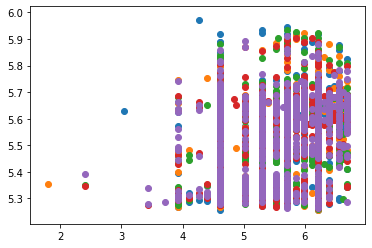

In [1108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r2scoref(lr,x_train,y_train)

Maximum r2 score corresponding to random state 95 is 0.07825031747793276


95

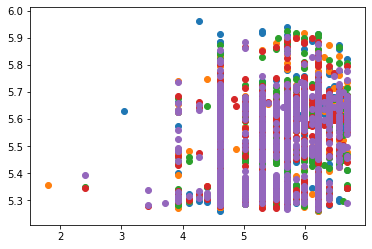

In [1109]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=0.001)
r2scoref(lso,x_train,y_train)